In [1]:
pip install torch torchvision


In [2]:
import torch
import torchvision
from torchvision import transforms
from PIL import Image


In [3]:
# Replace 'model_name' with the desired model, e.g., 'fasterrcnn_resnet50_fpn'
model = torchvision.models.detection.fasterrcnn_resnet50_fpn_v2(pretrained=True)
model.eval()


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_V2_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_v2_coco-dd69338a.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_v2_coco-dd69338a.pth
100%|██████████| 167M/167M [00:03<00:00, 45.4MB/s]


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
       

In [4]:
def load_and_preprocess_image(image_path):
    image = Image.open(image_path).convert("RGB")
    transform = transforms.Compose([transforms.ToTensor()])
    image_tensor = transform(image)
    return image_tensor


In [5]:
def get_prediction(image_tensor):
    with torch.no_grad():
        prediction = model([image_tensor])
    return prediction

def extract_bounding_boxes(prediction, threshold=0.5):
    boxes = prediction[0]['boxes'].cpu().numpy()
    scores = prediction[0]['scores'].cpu().numpy()
    labels = prediction[0]['labels'].cpu().numpy()

    # Filter out predictions with low confidence
    mask = scores >= threshold
    boxes = boxes[mask]
    scores = scores[mask]
    labels = labels[mask]

    return boxes, scores, labels


In [6]:
def visualize(image, boxes, labels):
    import matplotlib.pyplot as plt
    import matplotlib.patches as patches

    fig, ax = plt.subplots(1)
    ax.imshow(image)

    for box, label in zip(boxes, labels):
        xmin, ymin, xmax, ymax = box
        width = xmax - xmin
        height = ymax - ymin

        rect = patches.Rectangle((xmin, ymin), width, height, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

        ax.text(
            xmin,
            ymin,
            f"Label: {label}",
            fontsize=8,
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle="round,pad=0.2"),
        )

    plt.show()


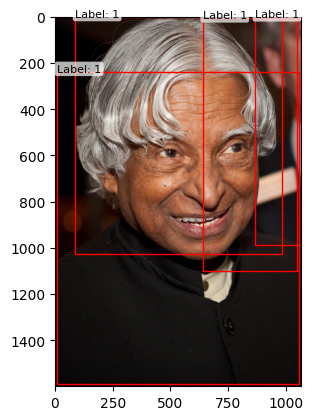

In [7]:
if __name__ == '__main__':
    image_path = 'path_to_your_image.jpg'
    image_tensor = load_and_preprocess_image('/content/abdul kalam.jpg')
    prediction = get_prediction(image_tensor)
    boxes, scores, labels = extract_bounding_boxes(prediction)

    image = Image.open('/content/abdul kalam.jpg')
    visualize(image, boxes, labels)
